In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [72]:
try:
    data = pd.read_csv('./boston_data.csv')
except FileNotFoundError:
    print("File not found, please provide the correct file path")
    data = None

In [73]:
if data is not None:
    print(data.head())
else:
    raise SystemExit("No data available. Exiting the program.")

      crim    zn  indus  chas    nox     rm   age     dis  rad    tax  \
0  0.15876   0.0  10.81   0.0  0.413  5.961  17.5  5.2873  4.0  305.0   
1  0.10328  25.0   5.13   0.0  0.453  5.927  47.2  6.9320  8.0  284.0   
2  0.34940   0.0   9.90   0.0  0.544  5.972  76.7  3.1025  4.0  304.0   
3  2.73397   0.0  19.58   0.0  0.871  5.597  94.9  1.5257  5.0  403.0   
4  0.04337  21.0   5.64   0.0  0.439  6.115  63.0  6.8147  4.0  243.0   

   ptratio   black  lstat  medv  
0     19.2  376.94   9.88  21.7  
1     19.7  396.90   9.22  19.6  
2     18.4  396.24   9.97  20.3  
3     14.7  351.85  21.45  15.4  
4     16.8  393.97   9.43  20.5  


In [74]:
if data.isnull().values.any():
    print("Data contains null values. Please clean the dataset before proceeding.")
else:
    print("No null values found in the dataset.")

No null values found in the dataset.


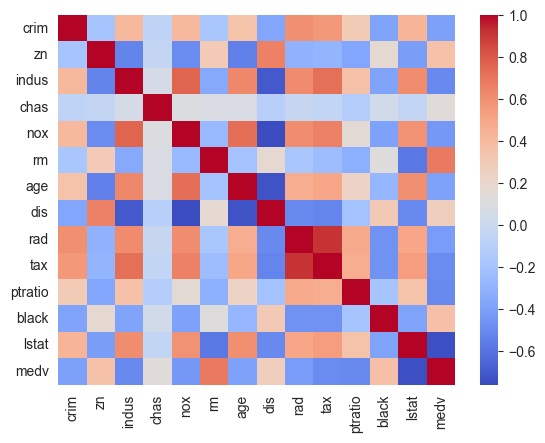

In [76]:
sns.heatmap(data.corr(), cmap='coolwarm')
plt.show()

In [77]:
print(abs(data.corr()["medv"]).sort_values())

chas       0.141400
dis        0.264876
zn         0.355608
black      0.360071
age        0.390863
crim       0.400956
rad        0.423508
nox        0.439225
tax        0.495792
indus      0.501698
ptratio    0.506313
rm         0.683541
lstat      0.742695
medv       1.000000
Name: medv, dtype: float64


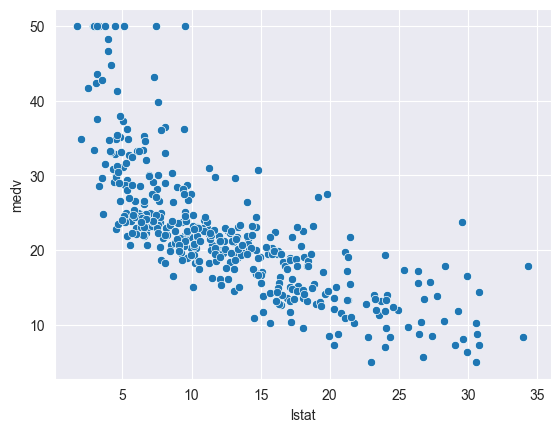

In [78]:
sns.scatterplot(x=data['lstat'], y=data['medv'])
plt.show()

In [79]:
y = data['medv']  # Cambié a 'medv' ya que parece ser la variable objetivo
X = data[['lstat']]  # Mantén X como DataFrame

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12)

In [81]:
scaler = StandardScaler()
X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [82]:
learning_rate = 0.1

In [83]:
class MyGradientDescent():
    def __init__(self, learning_rate):
        self.learning_rate = learning_rate
        self.beta1 = 0
        self.beta0 = 0

    def fit(self, X, y, epochs=100):
        N = len(X)
        history = []
        for e in range(epochs):
            for i in range(N):
                Xi = X[i]
                yi = y.iloc[i]  # Si y es un DataFrame o Serie de pandas

                hi = self.beta1 * Xi + self.beta0  # Producto punto para múltiples características
                f = hi - yi

                self.beta1 -= self.learning_rate * 2 / N * f * Xi
                self.beta0 -= self.learning_rate * 2 / N * f

            loss = mean_squared_error(y, self.predict(X))

            if e % 100 == 0:
                print(f"Epoch: {e}, Loss: {loss}")

            history.append(loss)

        return history

    def predict(self, X):
        return self.beta1 * X + self.beta0

In [85]:
model = MyGradientDescent(learning_rate)  # Instancia el modelo con la tasa de aprendizaje

history = model.fit(X_train_scl, y_train, x)  # Llama a fit() solo con X_train_scl e y_train

predictions = model.predict(X_test_scl)  # Obtén las predicciones con X_test_scl

Epoch: 0, Loss: 398.35110183654916
Epoch: 100, Loss: 35.98720684217852
Epoch: 200, Loss: 35.98720684188732
Epoch: 300, Loss: 35.98720684188732
Epoch: 400, Loss: 35.98720684188732
Epoch: 500, Loss: 35.98720684188732
Epoch: 600, Loss: 35.98720684188732
Epoch: 700, Loss: 35.98720684188732
Epoch: 800, Loss: 35.98720684188732
Epoch: 900, Loss: 35.98720684188732


<AxesSubplot:>

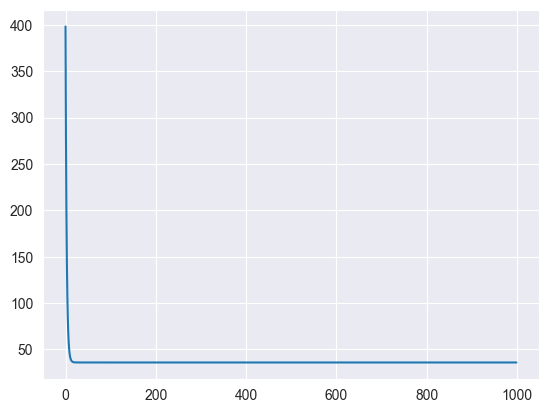

In [86]:
sns.lineplot(x=range(len(history)),y=history)

In [89]:
print(predictions.shape)
print(X_test_scl[:, 0].shape)

(101, 1)
(101,)


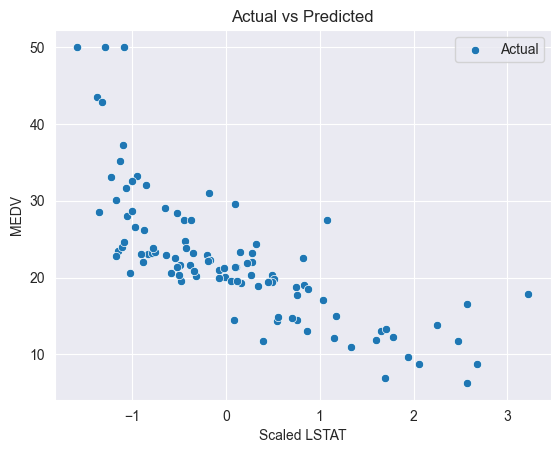

In [93]:
sns.scatterplot(x=X_test_scl[:, 0], y=y_test, label="Actual")
plt.xlabel("Scaled LSTAT")
plt.ylabel("MEDV")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()

In [94]:
mean_squared_error(y_test, predictions)

32.0090751142923

In [95]:
print(model.beta1)
print(model.beta0)

[-6.63881207]
[22.28048292]


In [96]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X_train_scl, y_train)
predictions_sklearn=model.predict(X_test_scl)
mean_squared_error(y_test, predictions_sklearn)

32.00876662192155

In [97]:
print(model.coef_)
print(model.intercept_)

[-6.6407313]
22.283828382838283


<AxesSubplot:ylabel='medv'>

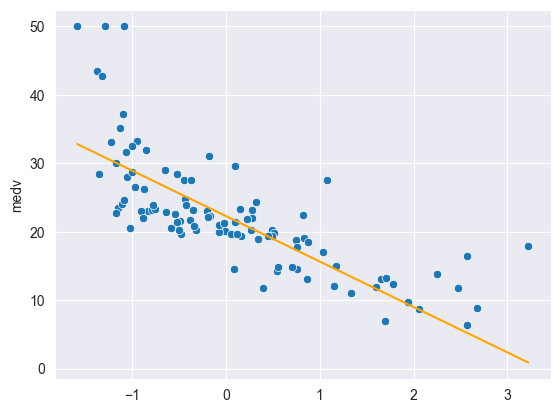

In [99]:
sns.scatterplot(x=X_test_scl[:,0],y=y_test)
sns.lineplot(x=X_test_scl[:,0],y=predictions_sklearn, color="orange")